In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('output_norms.csv')

In [4]:
df

,expert_id,layer_id,output_mean_norm
0,0,2,1.171875
1,0,3,3.546875
2,1,2,1.085938
3,0,7,6.937500
4,1,3,2.953125
...,...,...,...
251,5,29,102.000000
252,6,31,616.000000
253,6,29,103.500000
254,7,31,660.000000


<Axes: xlabel='layer_id', ylabel='output_mean_norm'>

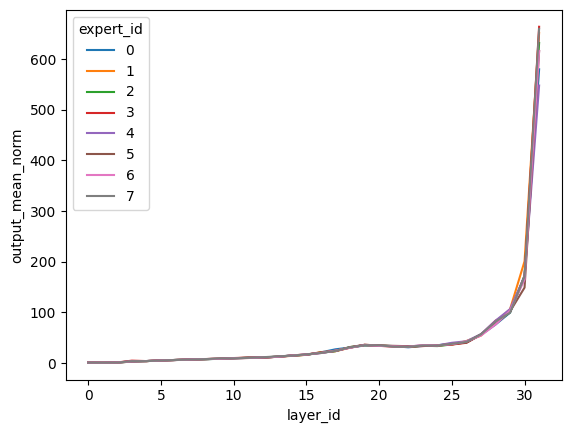

In [5]:
fig, ax = plt.subplots()
df["expert_id"] = df["expert_id"].astype("str")
sns.lineplot(data=df, x='layer_id', y='output_mean_norm', hue="expert_id", ax=ax)

In [6]:
fig.savefig('output_norms.pdf')

In [7]:
routing_weights = []
expert_ids = []
layer_ids = []

with open("/root/expert_activations/routing_weights.tsv", "r") as f:
    _ = f.readline()
    for line in f:
        _, layer_id, rws_per_expert = line.split("\t")
        rws_per_expert = [float(x) for x in rws_per_expert.split(",")]
        # find top 2 expert ids and weights
        top2 = sorted(enumerate(rws_per_expert), key=lambda x: x[1], reverse=True)[:2]
        for expert_id, rw in top2:
            routing_weights.append(rw)
            expert_ids.append(expert_id)
            layer_ids.append(int(layer_id))

In [12]:
df = pd.DataFrame({
    "expert_id": expert_ids,
    "layer_id": layer_ids,
    "routing_weight": routing_weights
})

In [13]:
df["expert_id"] = pd.Categorical(df["expert_id"].astype("str"), categories=[str(i) for i in range(8)], ordered=True)

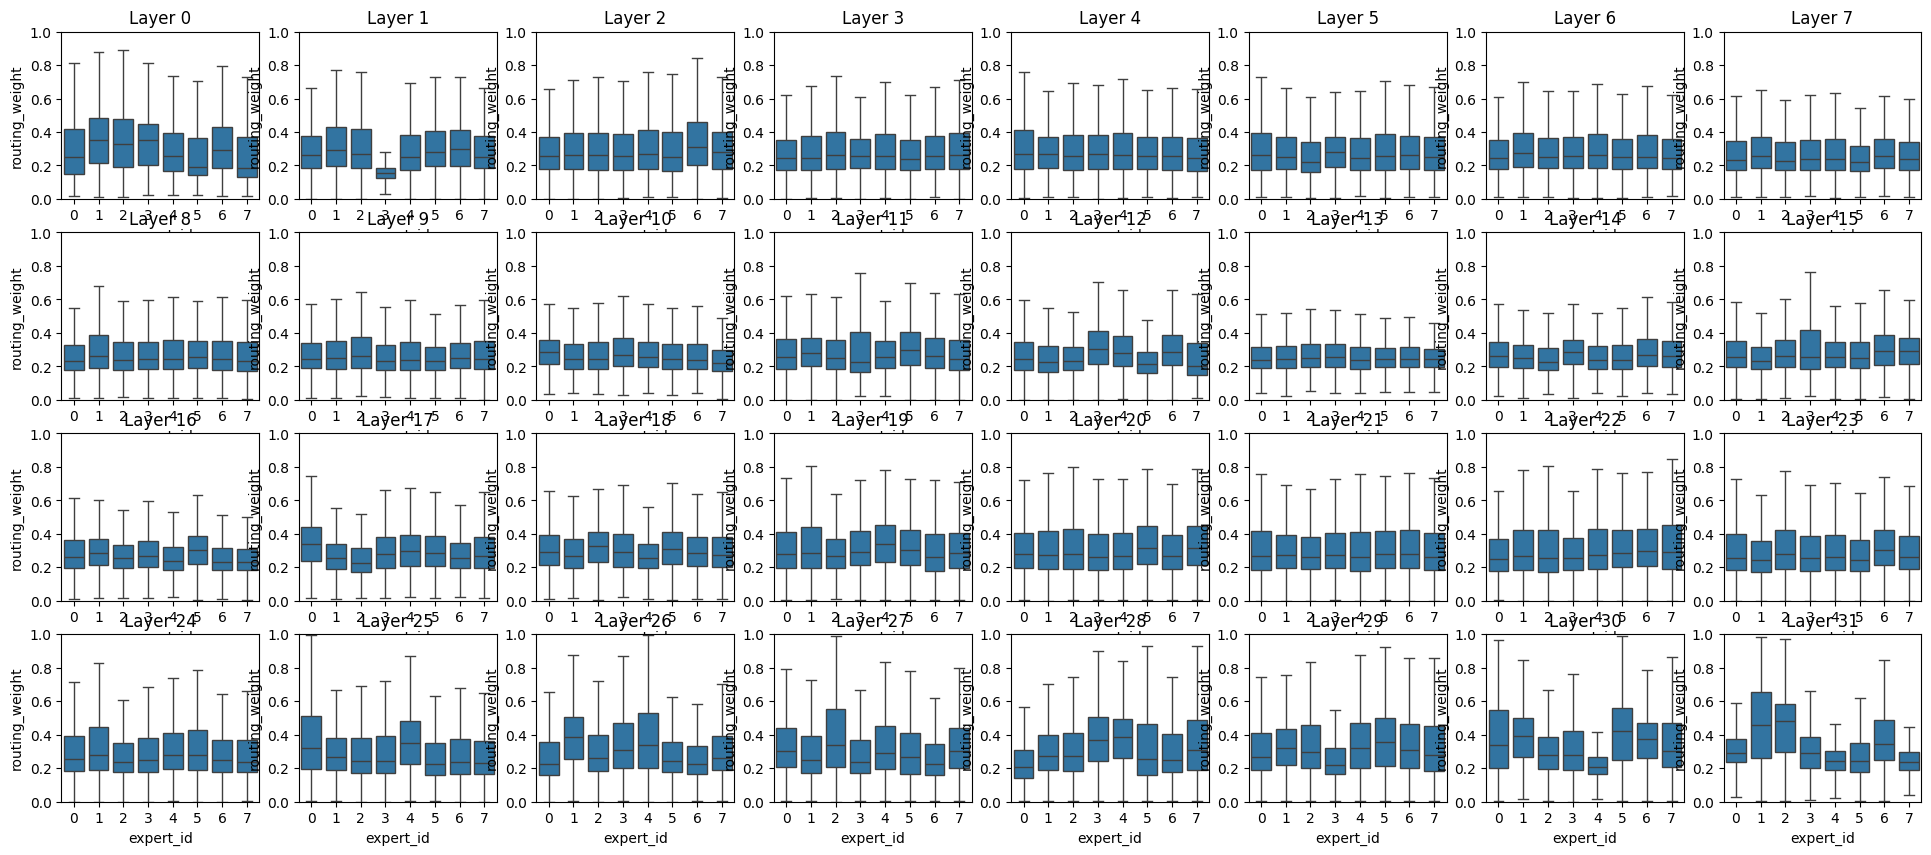

In [14]:
# plot routing weights
fig, axes = plt.subplots(4, 8, figsize=(24, 10))
for layer_id in range(32):
    ax = axes[layer_id // 8, layer_id % 8]
    sns.boxplot(data=df[df["layer_id"] == layer_id], x='expert_id', y='routing_weight', ax=ax, showfliers=False)
    ax.set_title(f"Layer {layer_id}")
    ax.set_ylim(0, 1)

In [15]:
fig.savefig('routing_weights.pdf')